In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Multiplication

In [7]:
# Creating the Computation Graph
x = tf.placeholder("float")
y = tf.placeholder("float")

xy = tf.multiply(x,y)

In [11]:
# Creating the Session
with tf.Session() as sess:
    print("%f x %f = %f"%(2, 3, sess.run(xy, feed_dict = {x:2, y:3})))

2.000000 x 3.000000 = 6.000000


## Linear Regression

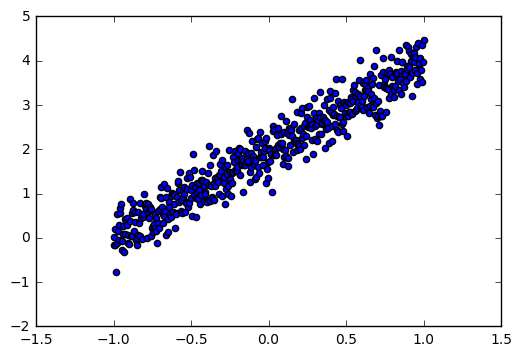

In [12]:
# Setting up the data
trX = np.linspace(-1, 1, 500)
trY = 2 * trX + np.random.randn(*trX.shape)*.35 + 2
plt.scatter(trX,trY);

In [14]:
# Setting up the variables and the graph
X = tf.placeholder("float")
Y = tf.placeholder("float")

w = tf.Variable(0.0,name="weights")
b = tf.Variable(0.0, name="bias")
y_hat = tf.add(tf.multiply(X,w),b)

In [16]:
# Defining the objective function and the optimizer
cost = tf.reduce_mean(tf.square(Y - y_hat))
train_operation = tf.train.GradientDescentOptimizer(.01).minimize(cost)

In [18]:
# Running the Session (Computation)
numEpochs = 200
costs = []

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for i in range(numEpochs):
        sess.run(train_operation,feed_dict={X:trX,Y: trY})
        costs.append(sess.run(cost,feed_dict={X:trX,Y: trY}))
        
    print("Final Error is %f"%costs[-1])
    wfinal,bfinal = sess.run(w),sess.run(b)
    print("Predicting  y = %.02f x + %.02f"%(wfinal,bfinal))
    print("Actually is y = %.02f x + %.02f"%(2,2))

Final Error is 0.195300
Predicting  y = 1.45 x + 1.95
Actually is y = 2.00 x + 2.00


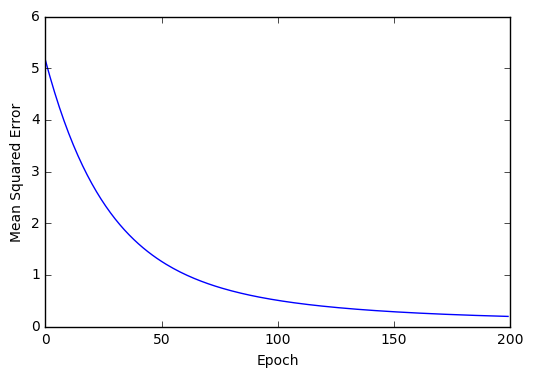

In [20]:
# Plotting the cost
plt.plot(costs)
plt.ylabel("Mean Squared Error")
plt.xlabel("Epoch");

## (Multivariable) Linear Regression

In [42]:
# Setting up the data
m = 8
n = 5
NUM_EXAMPLES = 100

W = np.random.rand(n,m)

trX = np.random.rand(100,n)
# trY = tf.multiply(X,W) + np.random.randn(NUM_EXAMPLES,m)
trY = trX.dot(W) + np.random.randn(NUM_EXAMPLES,m)

In [43]:
# Setting up the variables and the graph
x = tf.placeholder("float",shape=[None, n])
y = tf.placeholder("float",shape=[None, m])

w = tf.Variable(tf.zeros([n,m]))
y_hat = tf.matmul(x,w)

In [44]:
# Defining the objective function and the optimizer
cost = tf.reduce_mean(tf.square(y - y_hat))
train_operation = tf.train.GradientDescentOptimizer(.01).minimize(cost)

In [45]:
# Running the Session (Computation)
numEpochs = 1000
costs = []

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for i in range(numEpochs):
        sess.run(train_operation,feed_dict={x:trX,y: trY})
        costs.append(sess.run(cost,feed_dict={x:trX,y: trY}))
        
    print("Final Error is %f"%costs[-1])

Final Error is 1.051898


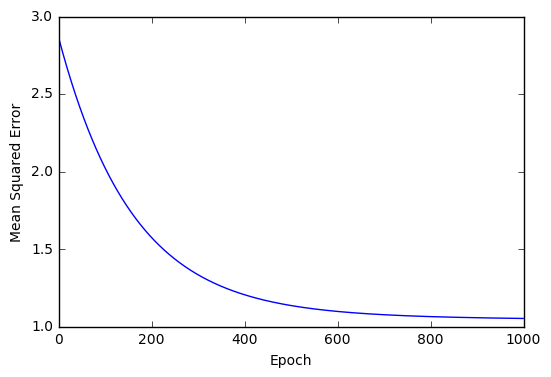

In [46]:
plt.plot(costs)
plt.ylabel("Mean Squared Error")
plt.xlabel("Epoch");

## Logistic Regression

In [47]:
# Importing the data and initilizing the variables
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST/",one_hot=True)
trX, trY = mnist.train.images, mnist.train.labels
teX, teY = mnist.test.images, mnist.test.labels

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST/t10k-labels-idx1-ubyte.gz


In [55]:
# Setting up the graph
X = tf.placeholder("float",shape=[None,784])
Y = tf.placeholder("float",shape=[None,10])

w = tf.Variable(tf.random_normal([784,10], stddev=0.01))

pred_logit = tf.matmul(X,w)
sample_cost = tf.nn.softmax_cross_entropy_with_logits(logits=pred_logit,labels=Y)
total_cost = tf.reduce_mean(sample_cost)

train_operation = tf.train.GradientDescentOptimizer(0.05).minimize(total_cost)
predict_operation = tf.argmax(pred_logit, 1)
accuracy_operation = tf.reduce_mean(
                        tf.cast(tf.equal(predict_operation,tf.argmax(Y,1)),tf.float32)
                        )

In [53]:
NUM_EPOCHS = 30
BATCH_SIZE = 200

accuracies = []

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for epoch in range(NUM_EPOCHS):
        for start in range(0,len(trX),BATCH_SIZE):
            end = start + BATCH_SIZE
            sess.run(train_operation, \
                    feed_dict = {X: trX[start:end],Y: trY[start:end]})
        accuracies.append(sess.run(accuracy_operation,feed_dict= {X: teX,Y: teY}))

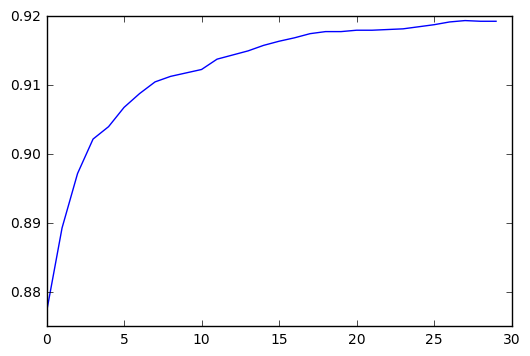

In [54]:
plt.plot(accuracies)

## Neural Networks

In [70]:
NUM_HIDDEN = 620

X = tf.placeholder("float",shape=[None,784])
Y = tf.placeholder("float",shape=[None,10])

def init_weights(shape): # We define this out of convenience
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

W_h = init_weights([784,NUM_HIDDEN]) # Weights entering the hidden layer
W_o = init_weights([NUM_HIDDEN,10]) # Weights entering the output layer
entering_hidden = tf.matmul(X,W_h)
exiting_hidden = tf.nn.sigmoid(entering_hidden)
model = tf.matmul(exiting_hidden,W_o)

sample_cost = tf.nn.softmax_cross_entropy_with_logits(logits=model,labels=Y)
total_cost = tf.reduce_mean(sample_cost)

train_operation = tf.train.GradientDescentOptimizer(0.2).minimize(total_cost)
predict_operation = tf.argmax(model, 1)
accuracy_operation = tf.reduce_mean(
                        tf.cast(tf.equal(predict_operation,tf.argmax(Y,1)),tf.float32)
                        )
NUM_EPOCHS = 100
BATCH_SIZE = 200
import tqdm
accuracies = []

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for epoch in tqdm.trange(NUM_EPOCHS):
        for start in range(0,len(trX),BATCH_SIZE):
            end = start + BATCH_SIZE
            sess.run(train_operation, \
                    feed_dict = {X: trX[start:end],Y: trY[start:end]})
        accuracies.append(sess.run(accuracy_operation,feed_dict= {X: teX,Y: teY}))
        print(accuracies[-1])

  1%|          | 1/100 [00:05<09:05,  5.51s/it]

0.8196


  2%|▏         | 2/100 [00:11<09:03,  5.54s/it]

0.8719


  3%|▎         | 3/100 [00:17<09:35,  5.93s/it]

0.8909


  4%|▍         | 4/100 [00:25<10:01,  6.26s/it]

0.9026


  5%|▌         | 5/100 [00:31<09:58,  6.30s/it]

0.9078


  6%|▌         | 6/100 [00:37<09:49,  6.27s/it]

0.9105


  7%|▋         | 7/100 [00:44<09:45,  6.29s/it]

0.9139


  8%|▊         | 8/100 [00:51<09:53,  6.46s/it]

0.9156


  9%|▉         | 9/100 [00:58<09:48,  6.46s/it]

0.917


 10%|█         | 10/100 [01:05<09:52,  6.58s/it]

0.9186


 11%|█         | 11/100 [01:11<09:39,  6.51s/it]

0.9198


 12%|█▏        | 12/100 [01:17<09:26,  6.44s/it]

0.9209


 13%|█▎        | 13/100 [01:23<09:19,  6.44s/it]

0.9229


 14%|█▍        | 14/100 [01:30<09:13,  6.44s/it]

0.9247


 15%|█▌        | 15/100 [01:38<09:16,  6.54s/it]

0.926


 16%|█▌        | 16/100 [01:43<09:03,  6.47s/it]

0.9284


 17%|█▋        | 17/100 [01:48<08:50,  6.39s/it]

0.9294


 18%|█▊        | 18/100 [01:53<08:36,  6.30s/it]

0.9305


 19%|█▉        | 19/100 [01:58<08:24,  6.23s/it]

0.9319


 20%|██        | 20/100 [02:03<08:14,  6.18s/it]

0.9339


 21%|██        | 21/100 [02:08<08:04,  6.13s/it]

0.9351


 22%|██▏       | 22/100 [02:13<07:54,  6.08s/it]

0.9365


 23%|██▎       | 23/100 [02:18<07:44,  6.03s/it]

0.938


 24%|██▍       | 24/100 [02:23<07:34,  5.98s/it]

0.9394


 25%|██▌       | 25/100 [02:28<07:25,  5.94s/it]

0.9407


 26%|██▌       | 26/100 [02:33<07:17,  5.91s/it]

0.9422


 27%|██▋       | 27/100 [02:38<07:08,  5.87s/it]

0.9432


 28%|██▊       | 28/100 [02:43<07:00,  5.84s/it]

0.9446


 29%|██▉       | 29/100 [02:48<06:52,  5.81s/it]

0.9459


 30%|███       | 30/100 [02:53<06:44,  5.78s/it]

0.9478


 31%|███       | 31/100 [02:58<06:36,  5.75s/it]

0.9485


 32%|███▏      | 32/100 [03:03<06:29,  5.73s/it]

0.9496


 33%|███▎      | 33/100 [03:08<06:22,  5.71s/it]

0.9501


 34%|███▍      | 34/100 [03:13<06:15,  5.69s/it]

0.9511


 35%|███▌      | 35/100 [03:20<06:11,  5.72s/it]

0.9521


 36%|███▌      | 36/100 [03:25<06:05,  5.71s/it]

0.953


 37%|███▋      | 37/100 [03:30<05:58,  5.68s/it]

0.9532


 38%|███▊      | 38/100 [03:35<05:50,  5.66s/it]

0.954


 39%|███▉      | 39/100 [03:40<05:44,  5.65s/it]

0.9549


 40%|████      | 40/100 [03:45<05:38,  5.63s/it]

0.9555


 41%|████      | 41/100 [03:50<05:31,  5.62s/it]

0.956


 42%|████▏     | 42/100 [03:55<05:25,  5.61s/it]

0.9566


 43%|████▎     | 43/100 [04:00<05:19,  5.60s/it]

0.957


 44%|████▍     | 44/100 [04:05<05:13,  5.59s/it]

0.9575


 45%|████▌     | 45/100 [04:10<05:06,  5.57s/it]

0.9583


 46%|████▌     | 46/100 [04:16<05:00,  5.57s/it]

0.9595


 47%|████▋     | 47/100 [04:21<04:54,  5.55s/it]

0.9602


 48%|████▊     | 48/100 [04:26<04:48,  5.54s/it]

0.9607


 49%|████▉     | 49/100 [04:31<04:42,  5.53s/it]

0.9609


 50%|█████     | 50/100 [04:36<04:36,  5.53s/it]

0.9613


 51%|█████     | 51/100 [04:42<04:30,  5.53s/it]

0.9619


 52%|█████▏    | 52/100 [04:47<04:25,  5.52s/it]

0.9623


 53%|█████▎    | 53/100 [04:52<04:19,  5.52s/it]

0.9626


 54%|█████▍    | 54/100 [04:57<04:13,  5.51s/it]

0.9632


 55%|█████▌    | 55/100 [05:02<04:07,  5.50s/it]

0.9636


 56%|█████▌    | 56/100 [05:07<04:01,  5.49s/it]

0.9641


 57%|█████▋    | 57/100 [05:12<03:55,  5.48s/it]

0.9643


 58%|█████▊    | 58/100 [05:17<03:49,  5.47s/it]

0.965


 59%|█████▉    | 59/100 [05:21<03:43,  5.45s/it]

0.9654


 60%|██████    | 60/100 [05:27<03:38,  5.45s/it]

0.9663


 61%|██████    | 61/100 [05:32<03:32,  5.44s/it]

0.9664


 62%|██████▏   | 62/100 [05:37<03:26,  5.44s/it]

0.9666


 63%|██████▎   | 63/100 [05:42<03:20,  5.43s/it]

0.9671


 64%|██████▍   | 64/100 [05:47<03:15,  5.42s/it]

0.9673


 65%|██████▌   | 65/100 [05:51<03:09,  5.41s/it]

0.968


 66%|██████▌   | 66/100 [05:56<03:03,  5.41s/it]

0.9684


 67%|██████▋   | 67/100 [06:02<02:58,  5.41s/it]

0.9688


 68%|██████▊   | 68/100 [06:07<02:52,  5.40s/it]

0.969


 69%|██████▉   | 69/100 [06:12<02:47,  5.40s/it]

0.9695


 70%|███████   | 70/100 [06:17<02:41,  5.39s/it]

0.97


 71%|███████   | 71/100 [06:21<02:35,  5.38s/it]

0.9702


 72%|███████▏  | 72/100 [06:26<02:30,  5.37s/it]

0.9704


 73%|███████▎  | 73/100 [06:31<02:24,  5.37s/it]

0.9709


 74%|███████▍  | 74/100 [06:37<02:19,  5.37s/it]

0.9714


 75%|███████▌  | 75/100 [06:42<02:14,  5.37s/it]

0.9716


 76%|███████▌  | 76/100 [06:47<02:08,  5.36s/it]

0.9717


 77%|███████▋  | 77/100 [06:52<02:03,  5.36s/it]

0.972


 78%|███████▊  | 78/100 [06:57<01:57,  5.35s/it]

0.9719


 79%|███████▉  | 79/100 [07:01<01:52,  5.34s/it]

0.9721


 80%|████████  | 80/100 [07:06<01:46,  5.33s/it]

0.9722


 81%|████████  | 81/100 [07:13<01:41,  5.35s/it]

0.9723


 82%|████████▏ | 82/100 [07:20<01:36,  5.37s/it]

0.9727


 83%|████████▎ | 83/100 [07:26<01:31,  5.38s/it]

0.9727


 84%|████████▍ | 84/100 [07:30<01:25,  5.37s/it]

0.9728


 85%|████████▌ | 85/100 [07:35<01:20,  5.36s/it]

0.9731


 86%|████████▌ | 86/100 [07:43<01:15,  5.39s/it]

0.9733


 87%|████████▋ | 87/100 [07:49<01:10,  5.40s/it]

0.9737


 88%|████████▊ | 88/100 [07:54<01:04,  5.39s/it]

0.9737


 89%|████████▉ | 89/100 [08:00<00:59,  5.40s/it]

0.9737


 90%|█████████ | 90/100 [08:05<00:53,  5.39s/it]

0.9739


 91%|█████████ | 91/100 [08:10<00:48,  5.39s/it]

0.9742


 92%|█████████▏| 92/100 [08:15<00:43,  5.38s/it]

0.9741


 93%|█████████▎| 93/100 [08:20<00:37,  5.38s/it]

0.974


 94%|█████████▍| 94/100 [08:26<00:32,  5.39s/it]

0.9741


 95%|█████████▌| 95/100 [08:31<00:26,  5.39s/it]

0.9742


 96%|█████████▌| 96/100 [08:36<00:21,  5.38s/it]

0.9742


 97%|█████████▋| 97/100 [08:42<00:16,  5.38s/it]

0.9743


 98%|█████████▊| 98/100 [08:47<00:10,  5.38s/it]

0.9745


 99%|█████████▉| 99/100 [08:52<00:05,  5.37s/it]

0.9746


100%|██████████| 100/100 [08:57<00:00,  5.37s/it]

0.9746


Final Accuracy was 0.9746


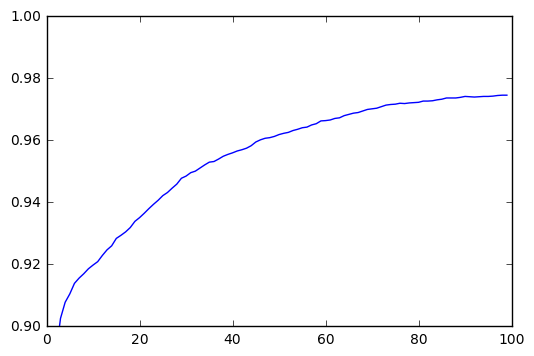

In [71]:
print("Final Accuracy was %.04f"%accuracies[-1])
plt.plot(accuracies);plt.ylim(.9,1);

## Modern Neural Network 
### RELU | Dropout | RMSProp Optimization | More hidden Layers

In [68]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape,stddev=0.01))

def model_gen(X,w_h,w_h2, w_o,drop_rate_input,drop_rate_hidden):
    out_X = tf.nn.dropout(X, drop_rate_input)
    
    in_H = tf.matmul(X,w_h)
    out_H = tf.nn.dropout(tf.nn.relu(in_H),drop_rate_hidden)
    
    in_H2 = tf.matmul(out_H,w_h2)
    out_H2 = tf.nn.relu(in_H2)
    
    model = tf.matmul(out_H2,w_o)
    return model

X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])

w_h = init_weights([784, 625])
w_h2 = init_weights([625, 625])
w_o = init_weights([625, 10])

drop_rate_input = tf.placeholder("float")
drop_rate_hidden = tf.placeholder("float")


model = model_gen(X,w_h,w_h2,w_o,drop_rate_input,drop_rate_hidden)

sample_cost = tf.nn.softmax_cross_entropy_with_logits(logits=model,labels=Y)
total_cost = tf.reduce_mean(sample_cost)

train_operation = tf.train.RMSPropOptimizer(0.001,0.9).minimize(total_cost)
predict_operation = tf.argmax(model, 1)
accuracy_operation = tf.reduce_mean(
                        tf.cast(tf.equal(predict_operation,tf.argmax(Y,1)),tf.float32)
                        )
NUM_EPOCHS = 20
BATCH_SIZE = 200
import tqdm
accuracies = []

with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for epoch in tqdm.trange(NUM_EPOCHS):
        for start in range(0,len(trX),BATCH_SIZE):
            end = start + BATCH_SIZE
            sess.run(train_operation, \
                    feed_dict = {X: trX[start:end],Y: trY[start:end],
                    drop_rate_input: 0.8, drop_rate_hidden: 0.5})
        accuracies.append(sess.run(accuracy_operation,feed_dict= {X: teX,Y: teY,drop_rate_input: 1, drop_rate_hidden: 1}))
        print(accuracies[-1])

  5%|▌         | 1/20 [00:13<04:19, 13.65s/it]

0.9028


 10%|█         | 2/20 [00:26<03:58, 13.23s/it]

0.9595


 15%|█▌        | 3/20 [00:36<03:29, 12.33s/it]

0.9632


 20%|██        | 4/20 [00:48<03:15, 12.22s/it]

0.9742


 25%|██▌       | 5/20 [01:00<03:02, 12.20s/it]

0.971


 30%|███       | 6/20 [01:12<02:49, 12.14s/it]

0.9753


 35%|███▌      | 7/20 [01:25<02:38, 12.20s/it]

0.9777


 40%|████      | 8/20 [01:37<02:26, 12.19s/it]

0.979


 45%|████▌     | 9/20 [01:49<02:13, 12.15s/it]

0.98


 50%|█████     | 10/20 [02:01<02:01, 12.19s/it]

0.9789


 55%|█████▌    | 11/20 [02:14<01:49, 12.20s/it]

0.9817


 60%|██████    | 12/20 [02:25<01:37, 12.14s/it]

0.9809


 65%|██████▌   | 13/20 [02:36<01:24, 12.07s/it]

0.9823


 70%|███████   | 14/20 [02:47<01:11, 11.96s/it]

0.9824


 75%|███████▌  | 15/20 [02:58<00:59, 11.87s/it]

0.9821


 80%|████████  | 16/20 [03:09<00:47, 11.82s/it]

0.9817


 85%|████████▌ | 17/20 [03:21<00:35, 11.83s/it]

0.984


 90%|█████████ | 18/20 [03:34<00:23, 11.91s/it]

0.9824


 95%|█████████▌| 19/20 [03:46<00:11, 11.94s/it]

0.9833


100%|██████████| 20/20 [03:59<00:00, 11.97s/it]

0.9826


Final Accuracy was 0.9826


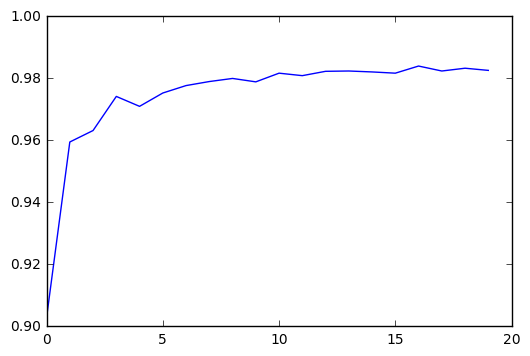

In [69]:
print("Final Accuracy was %.04f"%accuracies[-1])
plt.plot(accuracies);plt.ylim(.9,1);